In [417]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load CSV File

In [418]:
def loadCSV(filename):
    file = filename
    if '.csv' not in filename:
        file += '.csv'
    data = pd.read_csv(file, encoding = 'ISO-8859-1')
    return data

In [419]:
csvFile = 'Datasets/Prescription_Population_Combined.csv'

In [420]:
data = loadCSV(csvFile)
data

,County,Geography,"April 1, 2010 - Census","April 1, 2010 - Estimates Base",Population Estimate (as of July 1) - 2010,Population Estimate (as of July 1) - 2011,Population Estimate (as of July 1) - 2012,Population Estimate (as of July 1) - 2013,Population Estimate (as of July 1) - 2014,Population Estimate (as of July 1) - 2015,Population Estimate (as of July 1) - 2016,Population Estimate (as of July 1) - 2017,Population Estimate (as of July 1) - 2018,MME per cap 2010,MME per cap 2015,Geography.1
0,Autauga,"Autauga County, Alabama",54571,54574,54754,55208,54936,54713,54876,54838,55242,55443,55601,1050.8,1084.0,"Autauga County, Alabama"
1,Baldwin,"Baldwin County, Alabama",182265,182264,183111,186540,190143,194886,199189,202995,207712,212619,218022,1174.1,1148.5,"Baldwin County, Alabama"
2,Barbour,"Barbour County, Alabama",27457,27457,27330,27350,27174,26944,26758,26294,25819,25158,24881,638.6,577.6,"Barbour County, Alabama"
3,Bibb,"Bibb County, Alabama",22915,22920,22872,22747,22664,22516,22541,22562,22576,22555,22400,426.8,563.0,"Bibb County, Alabama"
4,Blount,"Blount County, Alabama",57322,57321,57373,57554,57570,57611,57521,57522,57517,57827,57840,453.5,459.0,"Blount County, Alabama"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,Sweetwater,"Sweetwater County, Wyoming",43806,43806,43574,43981,45005,45162,44957,44754,44275,43547,43051,674.6,1044.8,"Sweetwater County, Wyoming"
3138,Teton,"Teton County, Wyoming",21294,21298,21297,21414,21625,22318,22777,23016,23161,23261,23081,467.6,493.4,"Teton County, Wyoming"
3139,Uinta,"Uinta County, Wyoming",21118,21121,21089,20893,20994,20953,20827,20770,20691,20456,20299,863.7,1067.8,"Uinta County, Wyoming"
3140,Washakie,"Washakie County, Wyoming",8533,8528,8530,8448,8408,8414,8275,8280,8168,8035,7885,909.5,1444.0,"Washakie County, Wyoming"


# Remove Rows with Missing Values

In [421]:
data = data.dropna()
data

,County,Geography,"April 1, 2010 - Census","April 1, 2010 - Estimates Base",Population Estimate (as of July 1) - 2010,Population Estimate (as of July 1) - 2011,Population Estimate (as of July 1) - 2012,Population Estimate (as of July 1) - 2013,Population Estimate (as of July 1) - 2014,Population Estimate (as of July 1) - 2015,Population Estimate (as of July 1) - 2016,Population Estimate (as of July 1) - 2017,Population Estimate (as of July 1) - 2018,MME per cap 2010,MME per cap 2015,Geography.1
0,Autauga,"Autauga County, Alabama",54571,54574,54754,55208,54936,54713,54876,54838,55242,55443,55601,1050.8,1084.0,"Autauga County, Alabama"
1,Baldwin,"Baldwin County, Alabama",182265,182264,183111,186540,190143,194886,199189,202995,207712,212619,218022,1174.1,1148.5,"Baldwin County, Alabama"
2,Barbour,"Barbour County, Alabama",27457,27457,27330,27350,27174,26944,26758,26294,25819,25158,24881,638.6,577.6,"Barbour County, Alabama"
3,Bibb,"Bibb County, Alabama",22915,22920,22872,22747,22664,22516,22541,22562,22576,22555,22400,426.8,563.0,"Bibb County, Alabama"
4,Blount,"Blount County, Alabama",57322,57321,57373,57554,57570,57611,57521,57522,57517,57827,57840,453.5,459.0,"Blount County, Alabama"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,Sweetwater,"Sweetwater County, Wyoming",43806,43806,43574,43981,45005,45162,44957,44754,44275,43547,43051,674.6,1044.8,"Sweetwater County, Wyoming"
3138,Teton,"Teton County, Wyoming",21294,21298,21297,21414,21625,22318,22777,23016,23161,23261,23081,467.6,493.4,"Teton County, Wyoming"
3139,Uinta,"Uinta County, Wyoming",21118,21121,21089,20893,20994,20953,20827,20770,20691,20456,20299,863.7,1067.8,"Uinta County, Wyoming"
3140,Washakie,"Washakie County, Wyoming",8533,8528,8530,8448,8408,8414,8275,8280,8168,8035,7885,909.5,1444.0,"Washakie County, Wyoming"


# Find Average MME Per Cap by Population Range

Make an initial analysis. What is the average MME per cap for each population range?

1) Find the largest population

In [422]:
data['Population Estimate (as of July 1) - 2010'].max()

9822433

In [423]:
data['Population Estimate (as of July 1) - 2015'].max()

10097037

2) Calculate Averages for population ranges

In [424]:
pop_2010_range1 = 0
pop_2010_range1_count = 0
pop_2010_range2 = 0
pop_2010_range2_count = 0
pop_2010_range3 = 0
pop_2010_range3_count = 0
pop_2015_range1 = 0
pop_2015_range1_count = 0
pop_2015_range2 = 0
pop_2015_range2_count = 0
pop_2015_range3 = 0
pop_2015_range3_count = 0

In [425]:
for index, row in data.iterrows():
    pop_2010 = row[4]
    pop_2015 = row[9]
    MME_2010 = row[13]
    MME_2015 = row[14]
    
    if pop_2010 < 10000:
        pop_2010_range1 += MME_2010
        pop_2010_range1_count += 1
    elif pop_2010 < 100000:
        pop_2010_range2 += MME_2010
        pop_2010_range2_count += 1
    elif pop_2010 < 11000000:
        pop_2010_range3 += MME_2010
        pop_2010_range3_count += 1
        
    if pop_2015 < 10000:
        pop_2015_range1 += MME_2015
        pop_2015_range1_count += 1
    elif pop_2015 < 100000:
        pop_2015_range2 += MME_2015
        pop_2015_range2_count += 1
    elif pop_2015 < 11000000:
        pop_2015_range3 += MME_2015
        pop_2015_range3_count += 1

In [426]:
pop_2010_range1_count, pop_2010_range2_count, pop_2010_range3_count

(456, 1741, 551)

In [427]:
pop_2015_range1_count, pop_2015_range2_count, pop_2015_range3_count

(463, 1721, 564)

In [428]:
pop_2010_range1_avg = pop_2010_range1/pop_2010_range1_count
pop_2010_range2_avg = pop_2010_range2/pop_2010_range2_count
pop_2010_range3_avg = pop_2010_range3/pop_2010_range3_count

pop_2015_range1_avg = pop_2015_range1/pop_2015_range1_count
pop_2015_range2_avg = pop_2015_range2/pop_2015_range2_count
pop_2015_range3_avg = pop_2015_range3/pop_2015_range3_count

3) Generate bar graphs

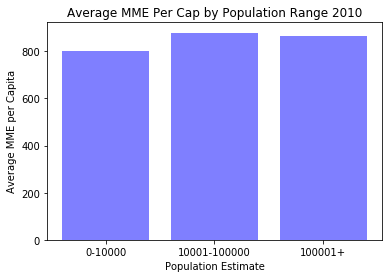

In [429]:
ranges = ['0-10000', '10001-100000', '100001+']
y_pos = np.arange(len(ranges))
mme_avgs = [pop_2010_range1_avg, pop_2010_range2_avg, pop_2010_range3_avg]

plt.bar(y_pos, mme_avgs, align='center', alpha=0.5, color='blue')
plt.xticks(y_pos, ranges)
plt.xlabel('Population Estimate')
plt.ylabel('Average MME per Capita')
plt.title('Average MME Per Cap by Population Range 2010')

plt.show()

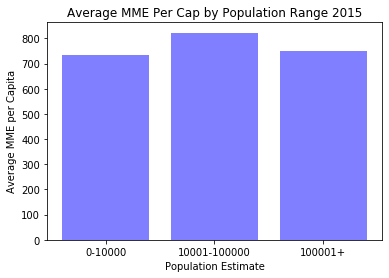

In [430]:
ranges = ['0-10000', '10001-100000', '100001+']
y_pos = np.arange(len(ranges))
mme_avgs = [pop_2015_range1_avg, pop_2015_range2_avg, pop_2015_range3_avg]

plt.bar(y_pos, mme_avgs, align='center', alpha=0.5, color='blue')
plt.xticks(y_pos, ranges)
plt.xlabel('Population Estimate')
plt.ylabel('Average MME per Capita')
plt.title('Average MME Per Cap by Population Range 2015')

plt.show()

Analysis by visual inspection. Highest MME per cap occurs in middle population range. No obvious conclusion can be drawn.

# Plot MME Per Cap by Population

Use scatter plot and line of best fit to determine a linear regression relationship.

In [431]:
X_2010 = data.iloc[:, 4].values.reshape(-1, 1)
Y_2010 = data.iloc[:, 13].values.reshape(-1, 1)
linear_regressor_2010 = LinearRegression()
linear_regressor_2010.fit(X_2010, Y_2010)
Y_pred_2010 = linear_regressor_2010.predict(X_2010)

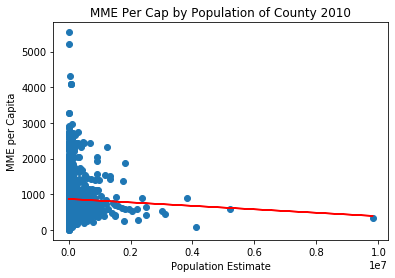

In [432]:
plt.scatter(X_2010, Y_2010)
plt.plot(X_2010, Y_pred_2010, color='red')
plt.xlabel('Population Estimate')
plt.ylabel('MME per Capita')
plt.title('MME Per Cap by Population of County 2010')

plt.show()

In [433]:
X_2015 = data.iloc[:, 9].values.reshape(-1, 1)
Y_2015 = data.iloc[:, 14].values.reshape(-1, 1)
linear_regressor_2015 = LinearRegression()
linear_regressor_2015.fit(X_2015, Y_2015)
Y_pred_2015 = linear_regressor_2015.predict(X_2015)

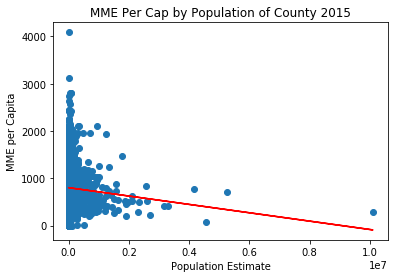

In [434]:
plt.scatter(X_2015, Y_2015)
plt.plot(X_2015, Y_pred_2015, color='red')
plt.xlabel('Population Estimate')
plt.ylabel('MME per Capita')
plt.title('MME Per Cap by Population of County 2015')

plt.show()

Analysis by visual inspection. Outliers are present. Data is densely packed in one area, no obvious linear relationship can be concluded.

# Remove Outliers

In [435]:
data = data[data['Population Estimate (as of July 1) - 2010'] < 3000000]

In [436]:
data = data[data['Population Estimate (as of July 1) - 2015'] < 3000000]

In [437]:
data = data[data['MME per cap 2010'] < 3000]

In [438]:
data = data[data['MME per cap 2015'] < 3000]

In [439]:
data

,County,Geography,"April 1, 2010 - Census","April 1, 2010 - Estimates Base",Population Estimate (as of July 1) - 2010,Population Estimate (as of July 1) - 2011,Population Estimate (as of July 1) - 2012,Population Estimate (as of July 1) - 2013,Population Estimate (as of July 1) - 2014,Population Estimate (as of July 1) - 2015,Population Estimate (as of July 1) - 2016,Population Estimate (as of July 1) - 2017,Population Estimate (as of July 1) - 2018,MME per cap 2010,MME per cap 2015,Geography.1
0,Autauga,"Autauga County, Alabama",54571,54574,54754,55208,54936,54713,54876,54838,55242,55443,55601,1050.8,1084.0,"Autauga County, Alabama"
1,Baldwin,"Baldwin County, Alabama",182265,182264,183111,186540,190143,194886,199189,202995,207712,212619,218022,1174.1,1148.5,"Baldwin County, Alabama"
2,Barbour,"Barbour County, Alabama",27457,27457,27330,27350,27174,26944,26758,26294,25819,25158,24881,638.6,577.6,"Barbour County, Alabama"
3,Bibb,"Bibb County, Alabama",22915,22920,22872,22747,22664,22516,22541,22562,22576,22555,22400,426.8,563.0,"Bibb County, Alabama"
4,Blount,"Blount County, Alabama",57322,57321,57373,57554,57570,57611,57521,57522,57517,57827,57840,453.5,459.0,"Blount County, Alabama"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,Sweetwater,"Sweetwater County, Wyoming",43806,43806,43574,43981,45005,45162,44957,44754,44275,43547,43051,674.6,1044.8,"Sweetwater County, Wyoming"
3138,Teton,"Teton County, Wyoming",21294,21298,21297,21414,21625,22318,22777,23016,23161,23261,23081,467.6,493.4,"Teton County, Wyoming"
3139,Uinta,"Uinta County, Wyoming",21118,21121,21089,20893,20994,20953,20827,20770,20691,20456,20299,863.7,1067.8,"Uinta County, Wyoming"
3140,Washakie,"Washakie County, Wyoming",8533,8528,8530,8448,8408,8414,8275,8280,8168,8035,7885,909.5,1444.0,"Washakie County, Wyoming"


In [440]:
X_2010 = data.iloc[:, 4].values.reshape(-1, 1)
Y_2010 = data.iloc[:, 13].values.reshape(-1, 1)
linear_regressor_2010 = LinearRegression()
linear_regressor_2010.fit(X_2010, Y_2010)
Y_pred_2010 = linear_regressor_2010.predict(X_2010)

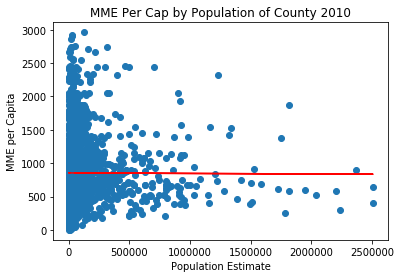

In [441]:
plt.scatter(X_2010, Y_2010)
plt.plot(X_2010, Y_pred_2010, color='red')
plt.xlabel('Population Estimate')
plt.ylabel('MME per Capita')
plt.title('MME Per Cap by Population of County 2010')

plt.show()

In [442]:
X_2015 = data.iloc[:, 9].values.reshape(-1, 1)
Y_2015 = data.iloc[:, 14].values.reshape(-1, 1)
linear_regressor_2015 = LinearRegression()
linear_regressor_2015.fit(X_2015, Y_2015)
Y_pred_2015 = linear_regressor_2015.predict(X_2015)

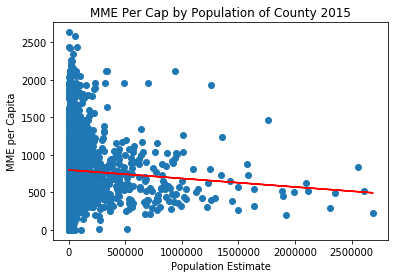

In [443]:
plt.scatter(X_2015, Y_2015)
plt.plot(X_2015, Y_pred_2015, color='red')
plt.xlabel('Population Estimate')
plt.ylabel('MME per Capita')
plt.title('MME Per Cap by Population of County 2015')

plt.show()

Removed 15 outliers. Scatter plots are still densely packed. Should not remove more or it will limit range of available data points.

# Save Altered CSV File

In [444]:
path = os.getcwd()

In [445]:
new_csv_filename = "/Datasets/Altered_Prescription_Population_Combined.csv"
filepath = path + new_csv_filename

In [446]:
data.to_csv(filepath, index = None, header = True)